In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import layers, models, Input

2021-11-08 14:36:58.040174: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 14:36:58.040247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load Data

In [3]:
x_train = np.load("./data/Xtrain_Classification_Part1.npy")
y_train = np.load("./data/Ytrain_Classification_Part1.npy")
x_test = np.load("./data/Xtest_Classification_Part1.npy")

In [13]:
image_1 = x_train[1,:]

In [15]:
image1_5050 = np.reshape(image_1,(50,50))

1.0


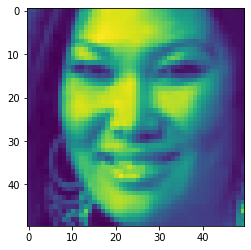

In [18]:
plt.imshow(image1_5050)
print(y_train[0])

# Perceptron

BACC = 0.8162482877732118


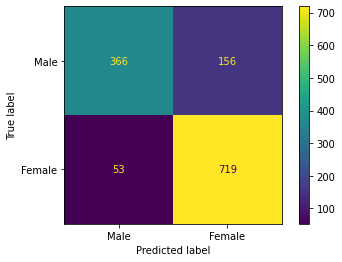

In [54]:
train_x, test_x, train_y, test_y  = train_test_split(x_train, y_train, test_size=0.2)

clf = Pipeline([
    ("scaler", MinMaxScaler(feature_range = (0, 255))),
    ("perceptron", Perceptron(tol=1e-3, random_state=0))
])
clf.fit(train_x, train_y)

y_hat = clf.predict(test_x)
conf = confusion_matrix(test_y, y_hat)
bacc = balanced_accuracy_score(test_y, y_hat)
# true positives and negatives
# tn, fp, fn, tp = confusion_matrix(test_y, y_hat).ravel()
ConfusionMatrixDisplay.from_predictions(test_y, y_hat,display_labels=["Male", "Female"])
print(f"BACC = {bacc}")

## SKLearn MLPClassifier

In [ ]:
# lbfgs - Adam for large DataSets For small datasets, however, ‘lbfgs’ can converge faster and perform better.
mlp = Pipeline([
        ('scaler', StandardScaler()),
        ('mpl', MLPClassifier(
            hidden_layer_sizes=(50,10),
            max_iter=20,
            alpha=1e-4,
            solver="sgd",
            verbose=10,
            random_state=1,
            learning_rate_init=0.1,
    ))]
)


mlp.fit(train_x, train_y)
y_hat = clf.predict(test_x)
#conf = confusion_matrix(test_y, y_hat)
bacc = balanced_accuracy_score(test_y, y_hat)
# true positives and negatives
# tn, fp, fn, tp = confusion_matrix(test_y, y_hat).ravel()
ConfusionMatrixDisplay.from_predictions(test_y, y_hat, display_labels=["Male", "Female"])
print(f"BACC = {bacc}")

# Tensorflow

## Multi Layer Perpectron

2021-11-08 14:37:14.146407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-08 14:37:14.146454: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-08 14:37:14.146482: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (darkstar): /proc/driver/nvidia/version does not exist
2021-11-08 14:37:14.146998: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              2501000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 3,503,001
Trainable params: 3,503,001
Non-trainable params: 0
_________________________________________________________________


2021-11-08 14:37:14.429335: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
518/518 [==============================] - 8s 15ms/step - loss: 0.6210 - accuracy: 0.6750 - val_loss: 0.5809 - val_accuracy: 0.6484
Epoch 2/20
518/518 [==============================] - 7s 14ms/step - loss: 0.5057 - accuracy: 0.7519 - val_loss: 0.4663 - val_accuracy: 0.7751
Epoch 3/20
518/518 [==============================] - 8s 15ms/step - loss: 0.4520 - accuracy: 0.7832 - val_loss: 0.5428 - val_accuracy: 0.7141
Epoch 4/20
518/518 [==============================] - 7s 14ms/step - loss: 0.4329 - accuracy: 0.7977 - val_loss: 0.4693 - val_accuracy: 0.7728
Epoch 5/20
518/518 [==============================] - 7s 14ms/step - loss: 0.4022 - accuracy: 0.8186 - val_loss: 0.4122 - val_accuracy: 0.8246
Epoch 6/20
518/518 [==============================] - 7s 14ms/step - loss: 0.3875 - accuracy: 0.8197 - val_loss: 0.4118 - val_accuracy: 0.8192
Epoch 7/20
518/518 [==============================] - 7s 14ms/step - loss: 0.3839 - accuracy: 0.8279 - val_loss: 0.4535 - val_accuracy: 0.7937

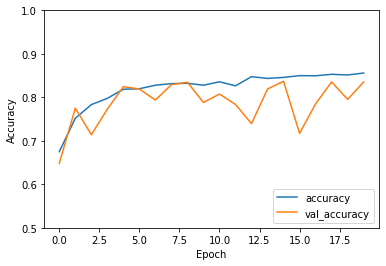

In [4]:
train_x, test_x, train_y, test_y  = train_test_split(x_train, y_train, test_size=0.2)

# Input scaled from (0, 255) to a range of (0, +1.)
mlp = models.Sequential()
mlp.add(Input(shape=(2500,)))
mlp.add(layers.Rescaling(scale=1 / 255))          # scale 0-255 to 0-1
mlp.add(layers.Dense(1000, activation="relu"))
mlp.add(layers.Dense(1000, activation="relu"))
#if softmax is chosen, the model will have more parameters that need to learn
mlp.add(layers.Dense(1, activation="sigmoid"))    # output layer
mlp.summary()
mlp.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
history = mlp.fit(train_x, train_y, epochs=20, batch_size=10,
                    validation_data=(test_x, test_y))

# y_hat = (model.predict(test_x) > 0.5).astype("int32")
# bacc = balanced_accuracy_score(test_y, y_hat)
# ConfusionMatrixDisplay.from_predictions(test_y, y_hat, display_labels=["Male", "Female"])
# print(f"BACC = {bacc}")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = mlp.evaluate(test_x,  test_y, verbose=2)

print(test_acc)

BACC = 0.809608093469514


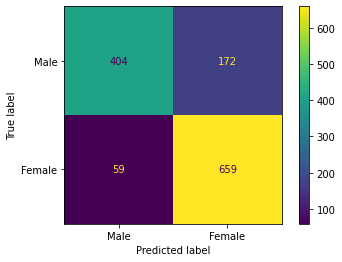

In [8]:
y_hat = (mlp.predict(test_x) > 0.5).astype("int32")
bacc = balanced_accuracy_score(test_y, y_hat)
ConfusionMatrixDisplay.from_predictions(test_y, y_hat, display_labels=["Male", "Female"])
print(f"BACC = {bacc}")

## Deep Neural Network

Epoch 1/25
81/81 [==============================] - 3s 37ms/step - loss: 0.6050 - binary_accuracy: 0.6613 - val_loss: 0.5034 - val_binary_accuracy: 0.7628
Epoch 2/25
81/81 [==============================] - 3s 37ms/step - loss: 0.4904 - binary_accuracy: 0.7693 - val_loss: 0.4253 - val_binary_accuracy: 0.8130
Epoch 3/25
81/81 [==============================] - 3s 37ms/step - loss: 0.4229 - binary_accuracy: 0.8141 - val_loss: 0.3882 - val_binary_accuracy: 0.8377
Epoch 4/25
81/81 [==============================] - 3s 41ms/step - loss: 0.3857 - binary_accuracy: 0.8337 - val_loss: 0.3726 - val_binary_accuracy: 0.8331
Epoch 5/25
81/81 [==============================] - 4s 51ms/step - loss: 0.3562 - binary_accuracy: 0.8472 - val_loss: 0.3250 - val_binary_accuracy: 0.8617
Epoch 6/25
81/81 [==============================] - 4s 48ms/step - loss: 0.3323 - binary_accuracy: 0.8580 - val_loss: 0.3174 - val_binary_accuracy: 0.8709
Epoch 7/25
81/81 [==============================] - 4s 44ms/step - los

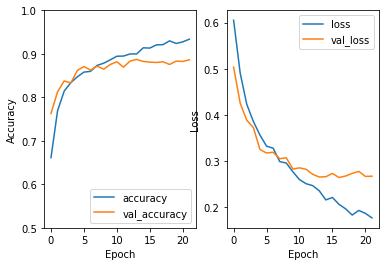

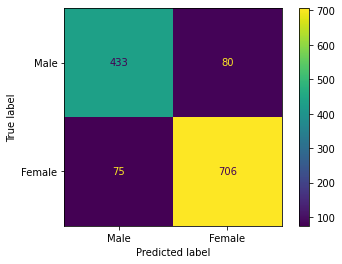

In [5]:
train_x, test_x, train_y, test_y  = train_test_split(x_train, y_train, test_size=0.2)

train_x = np.reshape(train_x, (len(train_x), 50, 50, 1))
test_x = np.reshape(test_x, (len(test_x),50, 50, 1))

# learning step
def ln_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

ln_callback = tf.keras.callbacks.LearningRateScheduler(ln_scheduler)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)  #restore_best_weights = False
# kernel size (3,5,7)
# batch size

model = models.Sequential()
model.add(Input(shape=(50, 50, 1)))
model.add(layers.Rescaling(scale=1 / 255))          # scale 0-255 to 0-1
model.add(layers.Conv2D(12, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.2))
# Flatten
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation="sigmoid"))
#model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

history = model.fit(train_x, train_y, epochs=25, batch_size=64,
                    validation_data=(test_x, test_y), callbacks=[earlystop , ln_callback])

# Evaluate the model
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history.history['binary_accuracy'], label='accuracy')
ax1.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0.5, 1])
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
print(f"Test Loss: {test_loss:.3f} Test Accuracy {test_acc:.3f}")

y_hat = (model.predict(test_x) > 0.5).astype("int32")
bacc = balanced_accuracy_score(test_y, y_hat)
ConfusionMatrixDisplay.from_predictions(test_y, y_hat, display_labels=["Male", "Female"])
print(f"BACC = {bacc:.3f}")

BACC = 0.8740119255315697


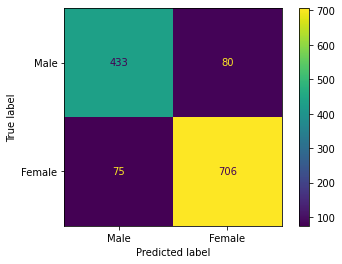

In [6]:
y_hat = (model.predict(test_x) > 0.5).astype("int32")
bacc = balanced_accuracy_score(test_y, y_hat)
ConfusionMatrixDisplay.from_predictions(test_y, y_hat, display_labels=["Male", "Female"])
print(f"BACC = {bacc}")

In [13]:
# predições
print("Test input shape", x_test.shape)
x_test_50_50 = np.reshape(x_test, (len(x_test),50, 50, 1))
y_hat = (model.predict(x_test_50_50) > 0.5).astype("int32")
print("Test output shape", y_hat.reshape(-1).shape)
np.save("y_hat_classification_prob1.npy", y_hat.reshape(-1))

Test input shape (1164, 2500)
Test output shape (1164,)


In [14]:
# Validação de shapes
load_y_hat = np.load("y_hat_classification_prob1.npy")
print("Load shape", load_y_hat.shape)

Load shape (1164,)
